In [1]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

# HW 2:  Root Finding and Optimization

## Question 1 - Fun with Fixed Point iteration

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  Consider the function 

$$
    f(x) = x^2 - M
$$

which has a positive root at at $x=\sqrt{M}$.   Here we will try to solve this using  fixed point iteration

$$
    x_{k+1} = g(x_k)
$$
for several different iteration functions $g(x)$ (see below)

For each function $g$:

- Confirm analytically that $x=\sqrt{M}$ is a fixed point of $g(x)$
- Analyze the convergence behavior close to the fixed-point and determine the stability of the iterative scheme
- Now set $M=3$  and $x_0 = 2$.  Make a nicely labeled convergence plot showing the log of the relative error as a function of iteration. How many iterations are required to reduce the relative error to machine precision (if it converges)?

**Remember**: if you want to write $g^\prime$, remember to use `g^\prime` rather than `g'` in $\LaTeX$

**(a)** [4] To help with the last part,  write a short python function to return N iterations of a fixed point iteration.

In [2]:
def fixed_point(g, x0, N=5):
    """conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    :Input:
        - *g* (function) - The iteration function
        - *x_0* (float) - Initial iterate
        - *N* (int) - number of terms in iteration
     
    :Output:
        x: numpy array (float)
            array containing the iterations [ x0, x1, ... x_N ]
    """
    #initialise an array to hold N+1 values, including the inital value x0
    x = numpy.zeros(N+1)

    #iterate through values, starting from x0.
    for i in range(N+1):
        x[i] = g(x[i-1]) #each new x[i] depends on the previous value x[i-1]

    return x

In [3]:
### Free cell for messing with your code

In [4]:
# Testing Cell

N = 5
g = lambda x: numpy.cos(x)
x0 = 1.
answer = numpy.array([1., 0.54030231, 0.85755322, 0.65428979, 0.79348036, 0.70136877])

x = fixed_point(g, x0, N )
numpy.testing.assert_allclose(x, answer)
print('success: passed N=5 test')

x_true = 0.7390851332153119
x = fixed_point(g, x0, 1000)
numpy.testing.assert_almost_equal(x[-1],x_true)
print('success: passed N=1000 test')

success: passed N=5 test
success: passed N=1000 test


**(b)** [6] analyze the problem with 
$$ g(x) = 1 + x - \frac{x^2}{M}$$

Firstly, for $x=\sqrt{M}$, we can confirm this is a fixed point as $g(\sqrt{M})= 1 + \sqrt{M} - \frac{M}{M} = 1 + \sqrt{M} - 1$, thus proving that $g(\sqrt{M})=\sqrt{M}$ and that it is a fixed point.

To find if $g(x)$ converges, we must check at $g'(x^*) < 1$. First let's compute the derivative of $g(x)$: $$ g'(x) = 1 - \frac{2x}{m}$$ and: $$g'(\sqrt{M})= 1 - \frac{2\sqrt{M}}{M}$$

For M = 3, $$g'(\sqrt{3}) = 1 - \frac{2}{\sqrt{3}} < 1$$
Therefore, we know that this converges for M = 3, at the fixed point $x=\sqrt{M}$.

We now test the stability of the function and whether it converges to the point $x=\sqrt{M}$, where $\sqrt{M} = \sqrt(3) \approx 1.732$. We test the function using an initial guess of $x0=2.5$, and setting $N=20$ we see how are our answer is stable about the expected value, with small fluctuations about the fixed point. Our log of the relative error plot confirms that this is indeed linear convergence.

[1.         1.66666667 1.74074074 1.7306813  1.73226205 1.73201811
 1.73205586 1.73205003 1.73205093 1.73205079 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081]
Iteration 19: log(relative error) < log(machine epsilon)


/var/folders/j2/rkbxss0d4b10t_2h10nmd78w0000gn/T/ipykernel_23096/2735734751.py:17: RuntimeWarning: divide by zero encountered in log
  log_rel_errors = numpy.log(rel_errors[1:])


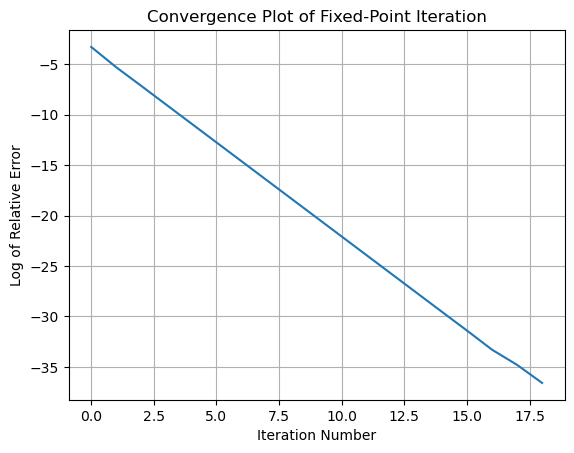

In [5]:
#define the function g(x) as g1, setting M=3 ad x0=2
def g1(x):
    return 1 + x - ((x**2)/3)

x0 = 2
N = 20
x_star = numpy.sqrt(3)
epsilon = numpy.finfo(float).eps  # Machine epsilon

#Set x_values to a variable
x_values = fixed_point(g1, x0, N)

print(x_values)

# Calculate relative errors and log errors
rel_errors = numpy.abs((x_values - x_star) / x_star)
log_rel_errors = numpy.log(rel_errors[1:])

# Find iteration where log(relative error) < log(machine epsilon)
for i, log_err in enumerate(log_rel_errors):
    if log_err < numpy.log(epsilon):
        print(f"Iteration {i + 1}: log(relative error) < log(machine epsilon)")
        break


plt.plot(log_rel_errors, label='Log of Relative Error')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Relative Error')
plt.title('Convergence Plot of Fixed-Point Iteration')
plt.grid(True)
plt.show()



 **(c)** [6] analyze the problem with 
$$ g(x) = \frac{M}{x}$$

For this question, we again see that $g'(\sqrt{M})= \frac{M}{\sqrt{M}} = \sqrt{M}$, again confirming that $x=\sqrt{M}$ is a fixed point.

The derivative of this function, $g'(x)= \frac{-M}{x^2}$. For $M = 3$ and $x = \sqrt{M}$, we get $g'(\sqrt{M})= \frac{-3}{3}$, for whcih the absolute value of is not $<1$. Therefore, we see that this function will diverge.

When testing the stability of this functionl, we set $x0=2$ and yield results that oscillate between 0 and infinity. Plot does not converge.

In [6]:
def g2(x):
    return 3/x

x0 = 2
N=10

x2_values = fixed_point(g2, x0, N)
print(x2_values)



[inf  0. inf  0. inf  0. inf  0. inf  0. inf]


/var/folders/j2/rkbxss0d4b10t_2h10nmd78w0000gn/T/ipykernel_23096/2321730589.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 3/x


**(d)** [6] Newton's method
$$ g(x) = x - \frac{f}{f^\prime}$$

with $$ f = x^2 - M$$

YOUR ANSWER HERE

Converged after 3 iterations.
[2.         1.75       1.73214286 1.73205081]


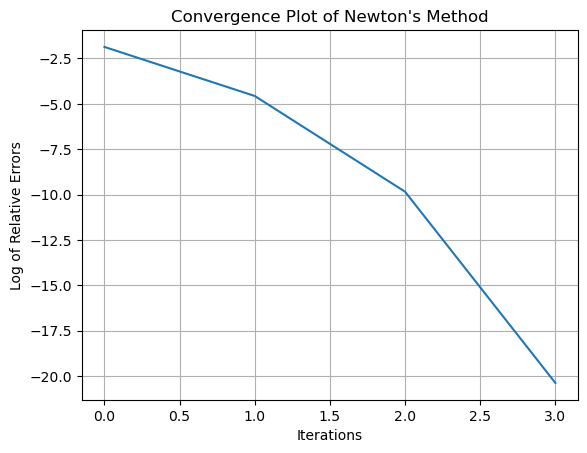

In [7]:
#define new fixed point function using Newton's method
def newton(x0, f, f1, tol, N):
    x = numpy.zeros(N+1)
    x[0] = x0
    for i in range (1, N+1):
        fx = f(x[i-1])
        f1x = f1(x[i-1])
        if f1x == 0:
            print("Error: Derivative is zero, Newton's method fails.")
            return x[:i]

        x[i] = x[i-1] - fx/f1x

        if numpy.abs(fx) < tol:
            print(f"Converged after {i} iterations.")
            return x[:i+1]
        
    return x

#define function f and f'
def f(x):
    return x**2 - 3

def f1(x):
    return 2*x 

x_star = numpy.sqrt(3)

x_values = newton(2, f, f1, 1e-2, 1000)
print(x_values)

rel_errors1 = numpy.abs((x_values - x_star) / x_star)
log_errors1 = numpy.log(rel_errors1)

# Find iteration where log(relative error) < log(machine epsilon)
for i in numpy.arange(1, len(log_errors1)):
    if log_errors1[i] < numpy.log(numpy.finfo(float).eps):
        print(f"Iteration {i}: log(relative error) < log(machine epsilon)")
        break

plt.plot(log_errors1, label='Log of Relative Errors')
plt.xlabel('Iterations')
plt.ylabel('Log of Relative Errors')
plt.title('Convergence Plot of Newton\'s Method')
plt.grid(True)

plt.show()


## Question 2 - Fun with Rootfinders and NewtSafe

This problem will explore the behavior of a range of different rootfinding routines against  a more challenging rootfinding problem.  Feel free to use any or all  of the routines presented in class which have been included in an auxiliary python file `rootfinding_optimization_schemes.py`


You need to have this file in the same directory with your homework for this notebook to import it.

In [8]:
#  Cell to import and test at least newton's method from class

from  rootfinding_optimization_schemes import newton

# set test function and its derivative
f = lambda x: numpy.cos(x) - x
f_prime = lambda x: -numpy.sin(x) - 1.

#set initial guess and call newton
x0 = 1.
x, x_array = newton(f, f_prime, x0,tol=1.e-12)

# run tests
answer = 0.7390851332151606
N = 5
numpy.testing.assert_almost_equal(x, answer)
numpy.testing.assert_almost_equal(N, len(x_array))
print("functions loaded correctly")

functions loaded correctly


Consider the function 

$$
    f(x) = \cos(x) +  N(x, A, \alpha, \beta))
$$
where

$$
    N(x, A, \alpha, \beta) =  A\left[\sin(\alpha x) + \sin(\beta x)\right]
$$

is a function that adds smooth additive "noise" with fixed amplitude $A = 0.05$ and varying frequencies $\alpha$ and $\beta$

**(a)** [4] Make a nicely labeled plot to showing the behavior of this function for 
* $\alpha = 0.$, $\beta =0.$
* $\alpha = 4.$, $\beta =5.$
* $\alpha = 27$, $\beta = 50$

over the domain $x\in[-2\pi, 2\pi]$. Make sure you have enough points to resolve the wiggles.  You can plot all three curves on the same plot

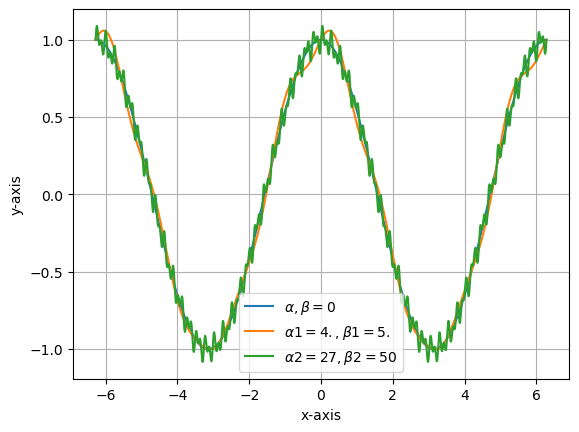

In [9]:
a = 0
b = 0
a1 = 4.
b1 = 5.
a2 = 27
b2 = 50
A = 0.05

lower_bound = -2*(numpy.pi)
upper_bound = 2*(numpy.pi)

x = numpy.linspace(lower_bound, upper_bound, 10000)
f = lambda x, A, a, b: numpy.cos(x) + (A * (numpy.sin(a*x) + numpy.sin(b*x)))
f1 = lambda x, A, a1, b1: numpy.cos(x) + (A * (numpy.sin(a1*x) + numpy.sin(b1*x)))
f2 = lambda x, A, a2, b2: numpy.cos(x) + (A * (numpy.sin(a2*x) + numpy.sin(b2*x)))

plt.plot(x, f(x, A, a, b), label=r'$\alpha,\beta=0$')
plt.plot(x, f1(x, A, a1, b1), label=r'$\alpha1 = 4.,\beta1 = 5.$')
plt.plot(x, f2(x, A, a2, b2), label=r'$\alpha2 = 27,\beta2 = 50$')
plt.legend()
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(True)

plt.show()


**(b)** [4] Explore the behavior of the following rootfinding routines 
* bisection
* newton
* secant
* brentq method using scipy.optimize.root_scalar
* **EXTRA CREDIT** any other method used in root_scalar

for finding a root of this function, given the bracket $x\in[x_0, x_1]$ with $x_0 = 0.2$, $x_1 = 2.$ for each ($\alpha, \beta$) pair

`params = [ (0., 0.), (4., 5.),  (27, 50.) ]`

For each routine,  report
* the root found $x^*$
* the value of $f$ at the root $f(x^*$)
* the number of iterations.

In [10]:
from rootfinding_optimization_schemes import bisection, newton, secant, parabolic_interpolation
from scipy.optimize import root_scalar


#First define each function, f1, f2 and f3 based on starting conditions
f1 = lambda x: numpy.cos(x) + 0.05 * (numpy.sin(0.*x) + numpy.sin(0.*x))
f2 = lambda x: numpy.cos(x) + 0.05 * (numpy.sin(4.*x) + numpy.sin(5.*x))
f3 = lambda x: numpy.cos(x) + 0.05 * (numpy.sin(27.*x) + numpy.sin(50.*x))
x0 = 0.2
x1 = 2.

#Via Bisection method
cb1, cb1_ar = bisection(f1, x0, x1)
cb2, cb2_ar = bisection(f2, x0, x1)
cb3, cb3_ar = bisection(f3, x0, x1)
print ('Bisection Method:' )
print ('For a = 0. and b = 0. root x* is ', cb1, '. The value of f(x*) is ', f1(cb1), ' and the number of iterations is ', numpy.size(cb1_ar))
print ('For a = 4. and b = 5. root x* is ', cb2, '. The value of f(x*) is ', f2(cb2), ' and the number of iterations is ', numpy.size(cb2_ar))
print ('For a = 27. and b = 50. root x* is ', cb3, '. The value of f(x*) is ', f3(cb3), ' and the number of iterations is ', numpy.size(cb3_ar))

#Via Newton Method
#define f_prime
f1_p = lambda x: -numpy.sin(x) + 0.05 * (numpy.cos(0.*x) + numpy.cos(0.*x))
f2_p = lambda x: -numpy.sin(x) + 0.05 * (4.*numpy.cos(4.*x) + 5.*numpy.cos(5.*x))
f3_p = lambda x: -numpy.sin(x) + 0.05 * (27.*numpy.cos(27.*x) + 50.*numpy.cos(50.*x))

nm1, nm1_ar = newton(f1, f1_p, x0)
nm2, nm2_ar = newton(f2, f2_p, x0)
nm3, nm3_ar = newton(f3, f3_p, x0)
print ()
print ('Newton Method:' )
print ('For a = 0. and b = 0. root x* is ', nm1, '. The value of f(x*) is ', f1(nm1), ' and the number of iterations is ', numpy.size(nm1_ar))
print ('For a = 4. and b = 5. root x* is ', nm2, '. The value of f(x*) is ', f2(nm2), ' and the number of iterations is ', numpy.size(nm2_ar))
print ('For a = 27. and b = 50. root x* is ', nm3, '. The value of f(x*) is ', f3(nm3), ' and the number of iterations is ', numpy.size(nm3_ar))

#Via Secant Method
sm1, sm1_ar = secant(f1, x0, x1)
sm2, sm2_ar = secant(f2, x0, x1)
sm3, sm3_ar = secant(f3, x0, x1)
print ()
print ('Secant Method:' )
print ('For a = 0. and b = 0. root x* is ', sm1, '. The value of f(x*) is ', f1(sm1), ' and the number of iterations is ', numpy.size(sm1_ar))
print ('For a = 4. and b = 5. root x* is ', sm2, '. The value of f(x*) is ', f2(sm2), ' and the number of iterations is ', numpy.size(sm2_ar))
print ('For a = 27. and b = 50. root x* is ', sm3, '. The value of f(x*) is ', f3(sm3), ' and the number of iterations is ', numpy.size(sm3_ar))

#Via Brentq method
bq1 = root_scalar(f1, bracket=[x0, x1], method='brentq')
bq2 = root_scalar(f2, bracket=[x0, x1], method='brentq')
bq3 = root_scalar(f3, bracket=[x0, x1], method='brentq')
print ()
print ('BrentQ Method:' )
print ('For a = 0. and b = 0. root x* is ', bq1.root, '. The value of f(x*) is ', f1(bq1.root), ' and the number of iterations is ', bq1.iterations)
print ('For a = 4. and b = 5. root x* is ', bq2.root, '. The value of f(x*) is ', f2(bq2.root), ' and the number of iterations is ', bq2.iterations)
print ('For a = 27. and b = 50. root x* is ', bq3.root, '. The value of f(x*) is ', f3(bq3.root), ' and the number of iterations is ', bq3.iterations)

#EXTRA CREDIT, using the Ridder method
r1 = root_scalar(f1, bracket=[x0,
                              x1], method='ridder')
r2 = root_scalar(f2, bracket=[x0, x1], method='ridder')
r3 = root_scalar(f3, bracket=[x0, x1], method='ridder')
print ()
print ('EXTRA CREDIT Ridder Method:' )
print ('For a = 0. and b = 0. root x* is ', r1.root, '. The value of f(x*) is ', f1(r1.root), ' and the number of iterations is ', r1.iterations)
print ('For a = 4. and b = 5. root x* is ', r2.root, '. The value of f(x*) is ', f2(r2.root), ' and the number of iterations is ', r2.iterations)
print ('For a = 27. and b = 50. root x* is ', r3.root, '. The value of f(x*) is ', f3(r3.root), ' and the number of iterations is ', r3.iterations)



Bisection Method:
For a = 0. and b = 0. root x* is  1.570796775817871 . The value of f(x*) is  -4.490229742968679e-07  and the number of iterations is  20
For a = 4. and b = 5. root x* is  1.6304405212402344 . The value of f(x*) is  1.9620940003989285e-07  and the number of iterations is  18
For a = 27. and b = 50. root x* is  1.5567201137542725 . The value of f(x*) is  -3.49143903736332e-08  and the number of iterations is  22

Newton Method:
For a = 0. and b = 0. root x* is  10.995575155774585 . The value of f(x*) is  8.682103085509201e-07  and the number of iterations is  8
For a = 4. and b = 5. root x* is  -14.096326236971352 . The value of f(x*) is  6.931560737888365e-08  and the number of iterations is  5
For a = 27. and b = 50. root x* is  1.5567202288060253 . The value of f(x*) is  -4.268580961318963e-07  and the number of iterations is  27

Secant Method:
For a = 0. and b = 0. root x* is  1.5707963267998242 . The value of f(x*) is  -4.927552640156338e-12  and the number of ite

**(c)** [4] Make a convergence plot showing the relative error at each step for Newton's method for the same three parameter pairs and initial guess $x_0 = 0.2$.

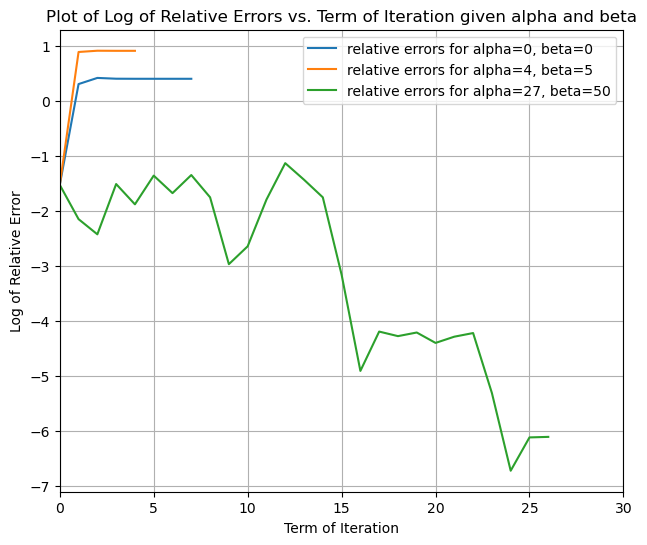

In [11]:
from  rootfinding_optimization_schemes import newton

f1 = lambda x: numpy.cos(x) + 0.05 * (numpy.sin(0.*x) + numpy.sin(0.*x))
f2 = lambda x: numpy.cos(x) + 0.05 * (numpy.sin(4.*x) + numpy.sin(5.*x))
f3 = lambda x: numpy.cos(x) + 0.05 * (numpy.sin(27.*x) + numpy.sin(50.*x))
x0 = 0.2
x1 = 2.

#Using Newton's Method, defining each function f

f1_p = lambda x: -numpy.sin(x) + 0.05 * (numpy.cos(0.*x) + numpy.cos(0.*x))
f2_p = lambda x: -numpy.sin(x) + 0.05 * (4.*numpy.cos(4.*x) + 5.*numpy.cos(5.*x))
f3_p = lambda x: -numpy.sin(x) + 0.05 * (27.*numpy.cos(27.*x) + 50.*numpy.cos(50.*x))

nm1, nm1_ar = newton(f1, f1_p, x0)
nm2, nm2_ar = newton(f2, f2_p, x0)
nm3, nm3_ar = newton(f3, f3_p, x0)

#Finding relative error arrays
r1 = numpy.abs((nm1_ar - numpy.pi/2) / numpy.pi/2)
r2 = numpy.abs((nm2_ar - numpy.pi/2) / numpy.pi/2)
r3 = numpy.abs((nm3_ar - numpy.pi/2) / numpy.pi/2)


fig = plt.figure(figsize= (16,6))
axes = fig.add_subplot (1, 2, 1)
plt.plot(numpy.arange(len(r1)), numpy.log(r1), label ='relative errors for alpha=0, beta=0') 
plt.plot(numpy.arange(len(r2)), numpy.log(r2), label ='relative errors for alpha=4, beta=5') 
plt.plot(numpy.arange(len(r3)), numpy.log(r3), label ='relative errors for alpha=27, beta=50')  
plt.legend()
plt.title("Plot of Log of Relative Errors vs. Term of Iteration given alpha and beta")                
plt.xlabel("Term of Iteration")
plt.ylabel("Log of Relative Error")
plt.xlim([0, 30])
plt.grid()
plt.show()

**(d)** [4] Briefly explain your results so far for all the methods.  Feel free to play with other initial parameters or to make additional plots.  

All the methods give similar values for the actual root, except for Newton's method, which only aligns with the others when alpha is 27 and beta is 50.

This difference likely stems from the fact that the cosine function has multiple roots. Newton's method might have overshot the expected root at π/2 and found a different one. This happens because Newton's method involves the term f/f', and near the peak of cos(x), this ratio can approach infinity. As f' approaches zero around points of sign change, the ratio becomes large since f still retains a positive or negative value, leading to a significant deviation.

**(e)** [6] Write a controlled Newton routine `NewtSafe`,  that finds a root with an initial bracket by combining newton steps with a bisection routine.  The basic algorithm is to first try Newton from the midpoint of the bracket.  If Newton predicts a solution outside of the bracket, ignore it and take a bisection step instead.  You can use and modify any of the rootfinding routines I presented in class, but write a decent docstring and raise appropriate exceptions as necessary. 

The routine should return the best estimate of the root and number of Newton Steps and the number of bisection steps

`x, N_newt, N_bisection = newtsafe(f, f_prime, a, b)`

In [12]:
def newtsafe(f,f_prime,a,b,tol = 1.e-6, max_steps=1000):
    
#Using basic structure of Newton's Method
    c = (a + b) / 2.
    x = c
    n_newt = 0
    n_bisection = 0
    x_array = [ c ]
    
    for k in range(1, max_steps + 1):        

        if (x - f(x) / f_prime(x)) < a or (x - f(x) / f_prime(x)) > b:
            f_a = f(a)
            f_b = f(b)
            f_c = f(x)
            
            if numpy.abs(f_c) < tol:
                break

            if numpy.sign(f_a) != numpy.sign(f_c):
                b = c
                f_b = f_c
            else:
                a = c
                f_a = f_c
                
            c = (a + b)/2.
            f_c = f(c)
            
            x = c
            
            x_array.append(c)
            n_bisection += 1
        
        else:
            if numpy.abs(f(x)) < tol:
                break
            x = x - f(x) / f_prime(x)
            x_array.append(x)
            n_newt += 1
        if k == max_steps:
            warnings.warn('Maximum number of steps exceeded')

    return x, n_newt, n_bisection

In [13]:
# you can play with your code here

In [14]:
# Testing Cell
from  rootfinding_optimization_schemes import newton
from scipy.optimize import root_scalar

a = 27
b = 50
A = 0.3
f = lambda x: numpy.cos(x) + A*(numpy.sin(a * x) + numpy.sin(b * x))
f_prime = lambda x: -numpy.sin(x) + A*(a*numpy.cos(a * x) + b*numpy.cos(b * x))

pi = numpy.pi

brackets = [ 
            (-0.68309670780092, 2.642524050776319),
            (-0.7104536143852529, 3.8152626763086603),
            (-0.5236057894835726, 3.9067882124238986),
            (-0.5275356434135271, 2.4988039593212776),
            (-0.3534683303763972, 3.9130408021252014)
           ]

for bracket in brackets:
    #a = numpy.random.uniform(low=-pi/4, high=pi/4)
    #b = numpy.random.uniform(low=3*pi/4, high=5*pi/4)
    a = bracket[0]
    b = bracket[1]
    x_n, x_array = newton(f, f_prime, (a + b)/2.)
    x_ns, N_n, N_b = newtsafe(f, f_prime, a, b)
    sol = root_scalar(f, bracket=(a, b),method='brentq')
    print('Bracket  = [{}, {}]'.format(a, b))
    print('Newton   = {},    N   = {}'.format(x_n, len(x_array)-1))
    print('NewtSafe = {},    N_n = {}, N_b = {}'.format(x_ns, N_n, N_b))
    print('brentq   = {},    N   = {}'.format(sol.root, sol.iterations))
    print()
    numpy.testing.assert_almost_equal(x_ns, sol.root,decimal=5)
    
try:
    x_ns, N_n, N_b = newtsafe(f, f_prime, 1.6, 2.0)
except ValueError as err:
    print(err)
    pass

print('success!')


Bracket  = [-0.68309670780092, 2.642524050776319]
Newton   = 1.27194847295657,    N   = 3
NewtSafe = 1.27194847295657,    N_n = 3, N_b = 0
brentq   = 1.2719484732512498,    N   = 9

Bracket  = [-0.7104536143852529, 3.8152626763086603]
Newton   = -23.8662065317763,    N   = 7
NewtSafe = 1.0884990113244402,    N_n = 3, N_b = 2
brentq   = 1.088499013515958,    N   = 13

Bracket  = [-0.5236057894835726, 3.9067882124238986]
Newton   = -10.863477689404652,    N   = 11
NewtSafe = 1.1106142646362411,    N_n = 5, N_b = 1
brentq   = 1.1106142646873127,    N   = 11

Bracket  = [-0.5275356434135271, 2.4988039593212776]
Newton   = 1.3248590962279085,    N   = 3
NewtSafe = 1.3248590962279085,    N_n = 3, N_b = 0
brentq   = 1.324859096815039,    N   = 9

Bracket  = [-0.3534683303763972, 3.9130408021252014]
Newton   = 1.1473182519095415,    N   = 10
NewtSafe = 1.1473181693677807,    N_n = 5, N_b = 1
brentq   = 1.1473182519138232,    N   = 10

success!


/var/folders/j2/rkbxss0d4b10t_2h10nmd78w0000gn/T/ipykernel_23096/3922982842.py:42: UserWarning: Maximum number of steps exceeded
  warnings.warn('Maximum number of steps exceeded')


## Question 3 - Solve a "real" rootfinding problem

In Homework 2, I asked you to *estimate* the number of terms in the taylor expansion of $e^x$ such that the relative error was less than $\epsilon_{mach}$.  This was essentially a non-linear problem in the number of steps $n$.  Here we will use a rootfinder to get this number more precisely.

**(a)** [8] provide a numerical solution for the number of terms $n$ in the Taylor polynomial expansion of exp(x) (i.e. $T_N(x))$ such that the relative error is

$$
    r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 

Give solutions for x = 0.1, 1., 10. ,100. , 709., 1000. and compare your numerical solution to the approximate solution given in last homework 

$$
    n > e*x
$$

by calculating the relative error between the your numerical solution and your simpler estimate.

Note: To make this problem easier, just use Stirling’s approximation $\log(n!) \approx n \log n − n$. which will work quite well.  However, for a little bit of extra credit solve this for the full problem and compare solutions.


For x= 0.1 the actual number of terms is  9 , approximate number of terms in int form:  1 . And this the relative error is  0.8888888888888888

For x= 1.0 the actual number of terms is  17 , approximate number of terms in int form:  3 . And this the relative error is  0.8235294117647058

For x= 10.0 the actual number of terms is  51 , approximate number of terms in int form:  28 . And this the relative error is  0.45098039215686275

For x= 100.0 the actual number of terms is  302 , approximate number of terms in int form:  272 . And this the relative error is  0.09933774834437085

For x= 709.0 the actual number of terms is  1958 , approximate number of terms in int form:  1928 . And this the relative error is  0.015321756894790603

For x= 1000.0 the actual number of terms is  2749 , approximate number of terms in int form:  2719 . And this the relative error is  0.010913059294288832



In [15]:
def calc_terms(x): 
    end = 1000000    
    #to find the actual terms in taylor series we must observe relative error accuracy of the taylor's series
    x_approx = 1
    terms = 0
    
    eps = numpy.finfo(float).eps
    
    for i in range(0, end):
        #apply stirlings rule to| \frac{x^{n+1}}{(n + 1)!}| to find the value at which it is equal to or below machine eps 
        #(n+1)log(x) - log((N+1))! = log(machine eps)
        #(n+1)log(x) - ((n+1)log(n+1) - (n+1))
        x_approx = (i+1) * numpy.log(x) - ((i+1) * numpy.log(i+1) - (i+1))
        if(x_approx <= numpy.log(eps)):
            terms = i
            break
    
    numap_terms = int(numpy.exp(1) * x) + 1
    r = numpy.abs((numap_terms - terms) / terms)
        
    return terms, numap_terms, r

def calc_terms_a(x): 
    end = 1000000
    test_n = numpy.arange(1,end, dtype=int)
    test_n = numpy.log(test_n)
    
    for m in range(1,end-1):
        test_n[m] += test_n[m-1]
    
    eps = numpy.finfo(float).eps
    
    
    #We now have an array of log(n!)
    #to find the actual terms in taylor series we must observe relative error accuracy of the taylor's series
    x_approx = 1
    terms = 0
    
    for i in range(1, end):
        #apply stirlings rule to| \frac{x^{n+1}}{(n + 1)!}| to find the value at which it is equal to or below machine eps 
        #(n+1)log(x) - log((N+1))! = log(machine eps)
        #(n+1)log(x) - ((n+1)log(n+1) - (n+1))
        x_approx = i * numpy.log(x) - test_n[i-1]
        if(x_approx < numpy.log(eps)):
            terms = i-1
            break
    
    numap_terms = int(numpy.exp(1) * x) + 1
    r = numpy.abs((numap_terms - terms) / terms)
        
    return terms, numap_terms, r

samples = [0.1, 1., 10., 100., 709., 1000.]
for i in samples:
    t, n, r = calc_terms(i)


    
print()
print()
print('FULL:')

for i in samples:
    t, n, r = calc_terms_a(i)
    print('For x=', i, 'the actual number of terms is ', t,', approximate number of terms in int form: ', n, '. And this the relative error is ', r) 
    print()




FULL:
For x= 0.1 the actual number of terms is  9 , approximate number of terms in int form:  1 . And this the relative error is  0.8888888888888888

For x= 1.0 the actual number of terms is  17 , approximate number of terms in int form:  3 . And this the relative error is  0.8235294117647058

For x= 10.0 the actual number of terms is  51 , approximate number of terms in int form:  28 . And this the relative error is  0.45098039215686275

For x= 100.0 the actual number of terms is  302 , approximate number of terms in int form:  272 . And this the relative error is  0.09933774834437085

For x= 709.0 the actual number of terms is  1958 , approximate number of terms in int form:  1928 . And this the relative error is  0.015321756894790603

For x= 1000.0 the actual number of terms is  2749 , approximate number of terms in int form:  2719 . And this the relative error is  0.010913059294288832

